In [1]:
import numpy as np
import pandas as pd
import sys, os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Reading Data

In [2]:
df = pd.read_csv("../data/train.csv")
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


# General statistics

In [3]:
# number of elements in the df
df.size

85000

In [4]:
df.count()

state                            4250
account_length                   4250
area_code                        4250
international_plan               4250
voice_mail_plan                  4250
number_vmail_messages            4250
total_day_minutes                4250
total_day_calls                  4250
total_day_charge                 4250
total_eve_minutes                4250
total_eve_calls                  4250
total_eve_charge                 4250
total_night_minutes              4250
total_night_calls                4250
total_night_charge               4250
total_intl_minutes               4250
total_intl_calls                 4250
total_intl_charge                4250
number_customer_service_calls    4250
churn                            4250
dtype: int64

In [5]:
df.shape

(4250, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

# Missing Values

In [7]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * mis_val / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending and remove columns with no missing values
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,0] != 0].sort_values(
    '% of Total Values', ascending=False).round(2)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    if mis_val_table_ren_columns.shape[0] == 0:
        return

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

missing_df = missing_values_table(df)

Your selected dataframe has 20 columns.
There are 0 columns that have missing values.


In [8]:
# number of rows with missing values for the whole dataset
def count_missing_rows(df):

    # Calculate total number rows with missing values
    missing_rows = sum([True for idx,row in df.iterrows() if any(row.isna())])

    # Calculate total number of rows
    total_rows = df.shape[0]

    # Calculate the percentage of missing rows
    print(f"{missing_rows} rows({round(((missing_rows/total_rows) * 100), 2)}%) contain atleast one missing value.")

count_missing_rows(df)

0 rows(0.0%) contain atleast one missing value.


# Duplicates

In [9]:
df.duplicated().sum()


0

# Data Types

In [10]:
#check if there are columns with mixed data types.
def show_cols_mixed_dtypes(df):
    mixed_dtypes = {'Column': [], 'Data type': []}
    for col in df.columns:
        dtype = pd.api.types.infer_dtype(df[col])
        if dtype.startswith("mixed"):
            mixed_dtypes['Column'].append(col)
            mixed_dtypes['Data type'].append(dtype)
    if len(mixed_dtypes['Column']) == 0:
        print('None of the columns contain mixed types.')
    else:
        print(pd.DataFrame(mixed_dtypes))

show_cols_mixed_dtypes(df)

None of the columns contain mixed types.


In [11]:
df.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [12]:
# get the columns with object data type
string_columns = df.select_dtypes(include='object').columns.tolist()
string_columns

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

In [13]:
def convert_to_string(df, columns):
    for col in columns:
        df[col] = df[col].astype("string")
convert_to_string(df, string_columns)

# Visualizaton

## Univariate Analysis

### Categorical Data

In [14]:
# Categorical data
# state, area_code, international_plan, voice_mail_plan, churn 

In [15]:
def plotly_plot_pie(df, column, limit=None, title=None):
    a = pd.DataFrame({'count': df.groupby([column]).size()}).reset_index()
    a = a.sort_values("count", ascending=False)
    if limit:
        a.loc[a['count'] < limit, column] = f'Other {column}s'
    if title == None:
        title=f'Distribution of {column}'
    fig = px.pie(a, values='count', names=column, title=title, width=800, height=500)
    fig.show()
plotly_plot_pie(df, 'churn')

In [16]:
def plotly_plot_pie(df, column, limit=None, title=None):
    a = pd.DataFrame({'count': df.groupby([column]).size()}).reset_index()
    a = a.sort_values("count", ascending=False)
    if limit:
        a.loc[a['count'] < limit, column] = f'Other {column}s'
    if title == None:
        title=f'Distribution of {column}'
    fig = px.pie(a, values='count', names=column, title=title, width=800, height=500)
    fig.show()
plotly_plot_pie(df, 'area_code')

In [17]:
def plotly_plot_hist(df, column, color=['cornflowerblue'], title=None):
    if title == None:
        title=f'Distribution of {column}'
    fig = px.histogram(
            df,
            x=column,
            marginal='box',
            color_discrete_sequence=color,
            title=title)
    fig.update_layout(bargap=0.01)
    fig.show()
plotly_plot_hist(df, 'international_plan')

In [18]:
def plotly_plot_hist(df, column, color=['cornflowerblue'], title=None):
    if title == None:
        title=f'Distribution of {column}'
    fig = px.histogram(
            df,
            x=column,
            marginal='box',
            color_discrete_sequence=color,
            title=title)
    fig.update_layout(bargap=0.01)
    fig.show()
plotly_plot_hist(df, 'area_code')

In [19]:
def plotly_plot_hist(df, column, color=['cornflowerblue'], title=None):
    if title == None:
        title=f'Distribution of {column}'
    fig = px.histogram(
            df,
            x=column,
            marginal='box',
            color_discrete_sequence=color,
            title=title)
    fig.update_layout(bargap=0.01)
    fig.show()
plotly_plot_hist(df, 'voice_mail_plan')

### Numerica Data

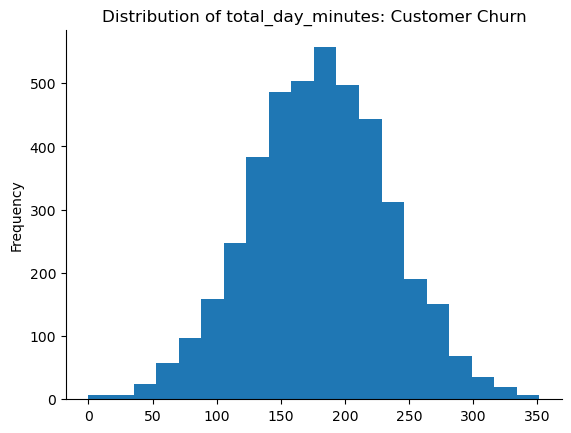

In [20]:
# Numerical data
# account_length, number_vmail_messages, total_day_minutes, total_day_calls, total_day_charge, total_eve_minutes, total_eve_calls, total_eve_charge, total_night_minutes, total_night_calls, total_night_charge, total_intl_minutes, total_intl_calls, total_intl_charge, number_customer_service_calls

df['total_day_minutes'].plot(kind='hist', bins=20, title='Distribution of total_day_minutes: Customer Churn')
plt.gca().spines[['top', 'right',]].set_visible(False)

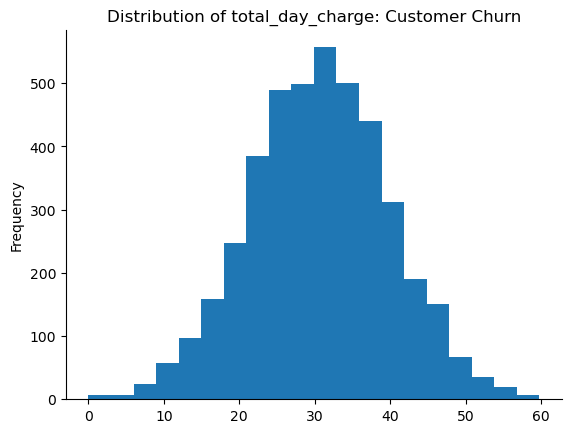

In [21]:
df['total_day_charge'].plot(kind='hist', bins=20, title='Distribution of total_day_charge: Customer Churn')
plt.gca().spines[['top', 'right',]].set_visible(False)

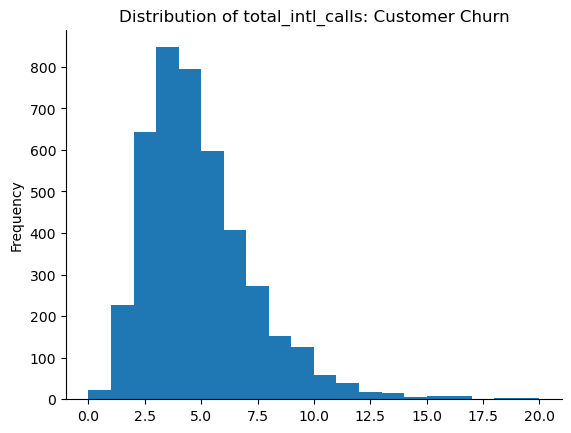

In [22]:
df['total_intl_calls'].plot(kind='hist', bins=20, title='Distribution of total_intl_calls: Customer Churn')
plt.gca().spines[['top', 'right',]].set_visible(False)

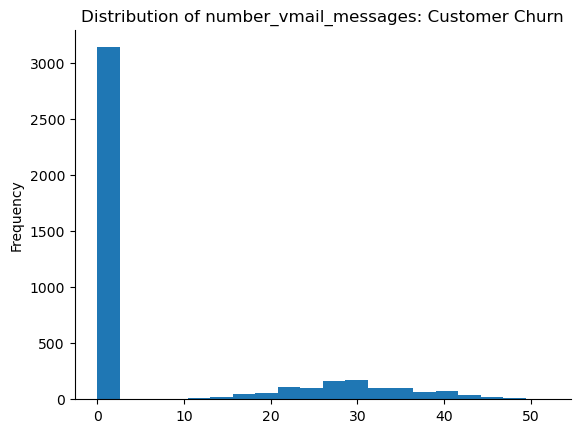

In [23]:
df['number_vmail_messages'].plot(kind='hist', bins=20, title='Distribution of number_vmail_messages: Customer Churn')
plt.gca().spines[['top', 'right',]].set_visible(False)

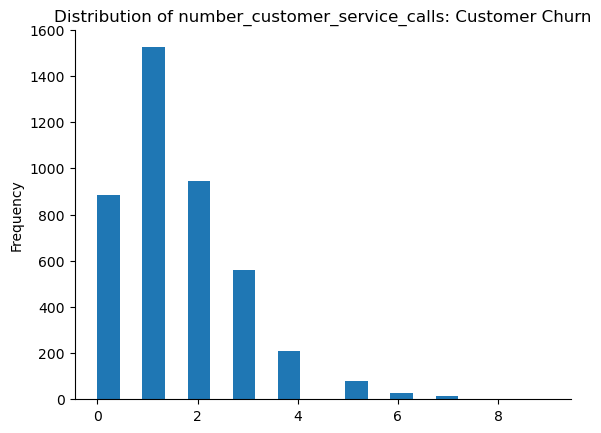

In [24]:
df['number_customer_service_calls'].plot(kind='hist', bins=20, title='Distribution of number_customer_service_calls: Customer Churn')
plt.gca().spines[['top', 'right',]].set_visible(False)


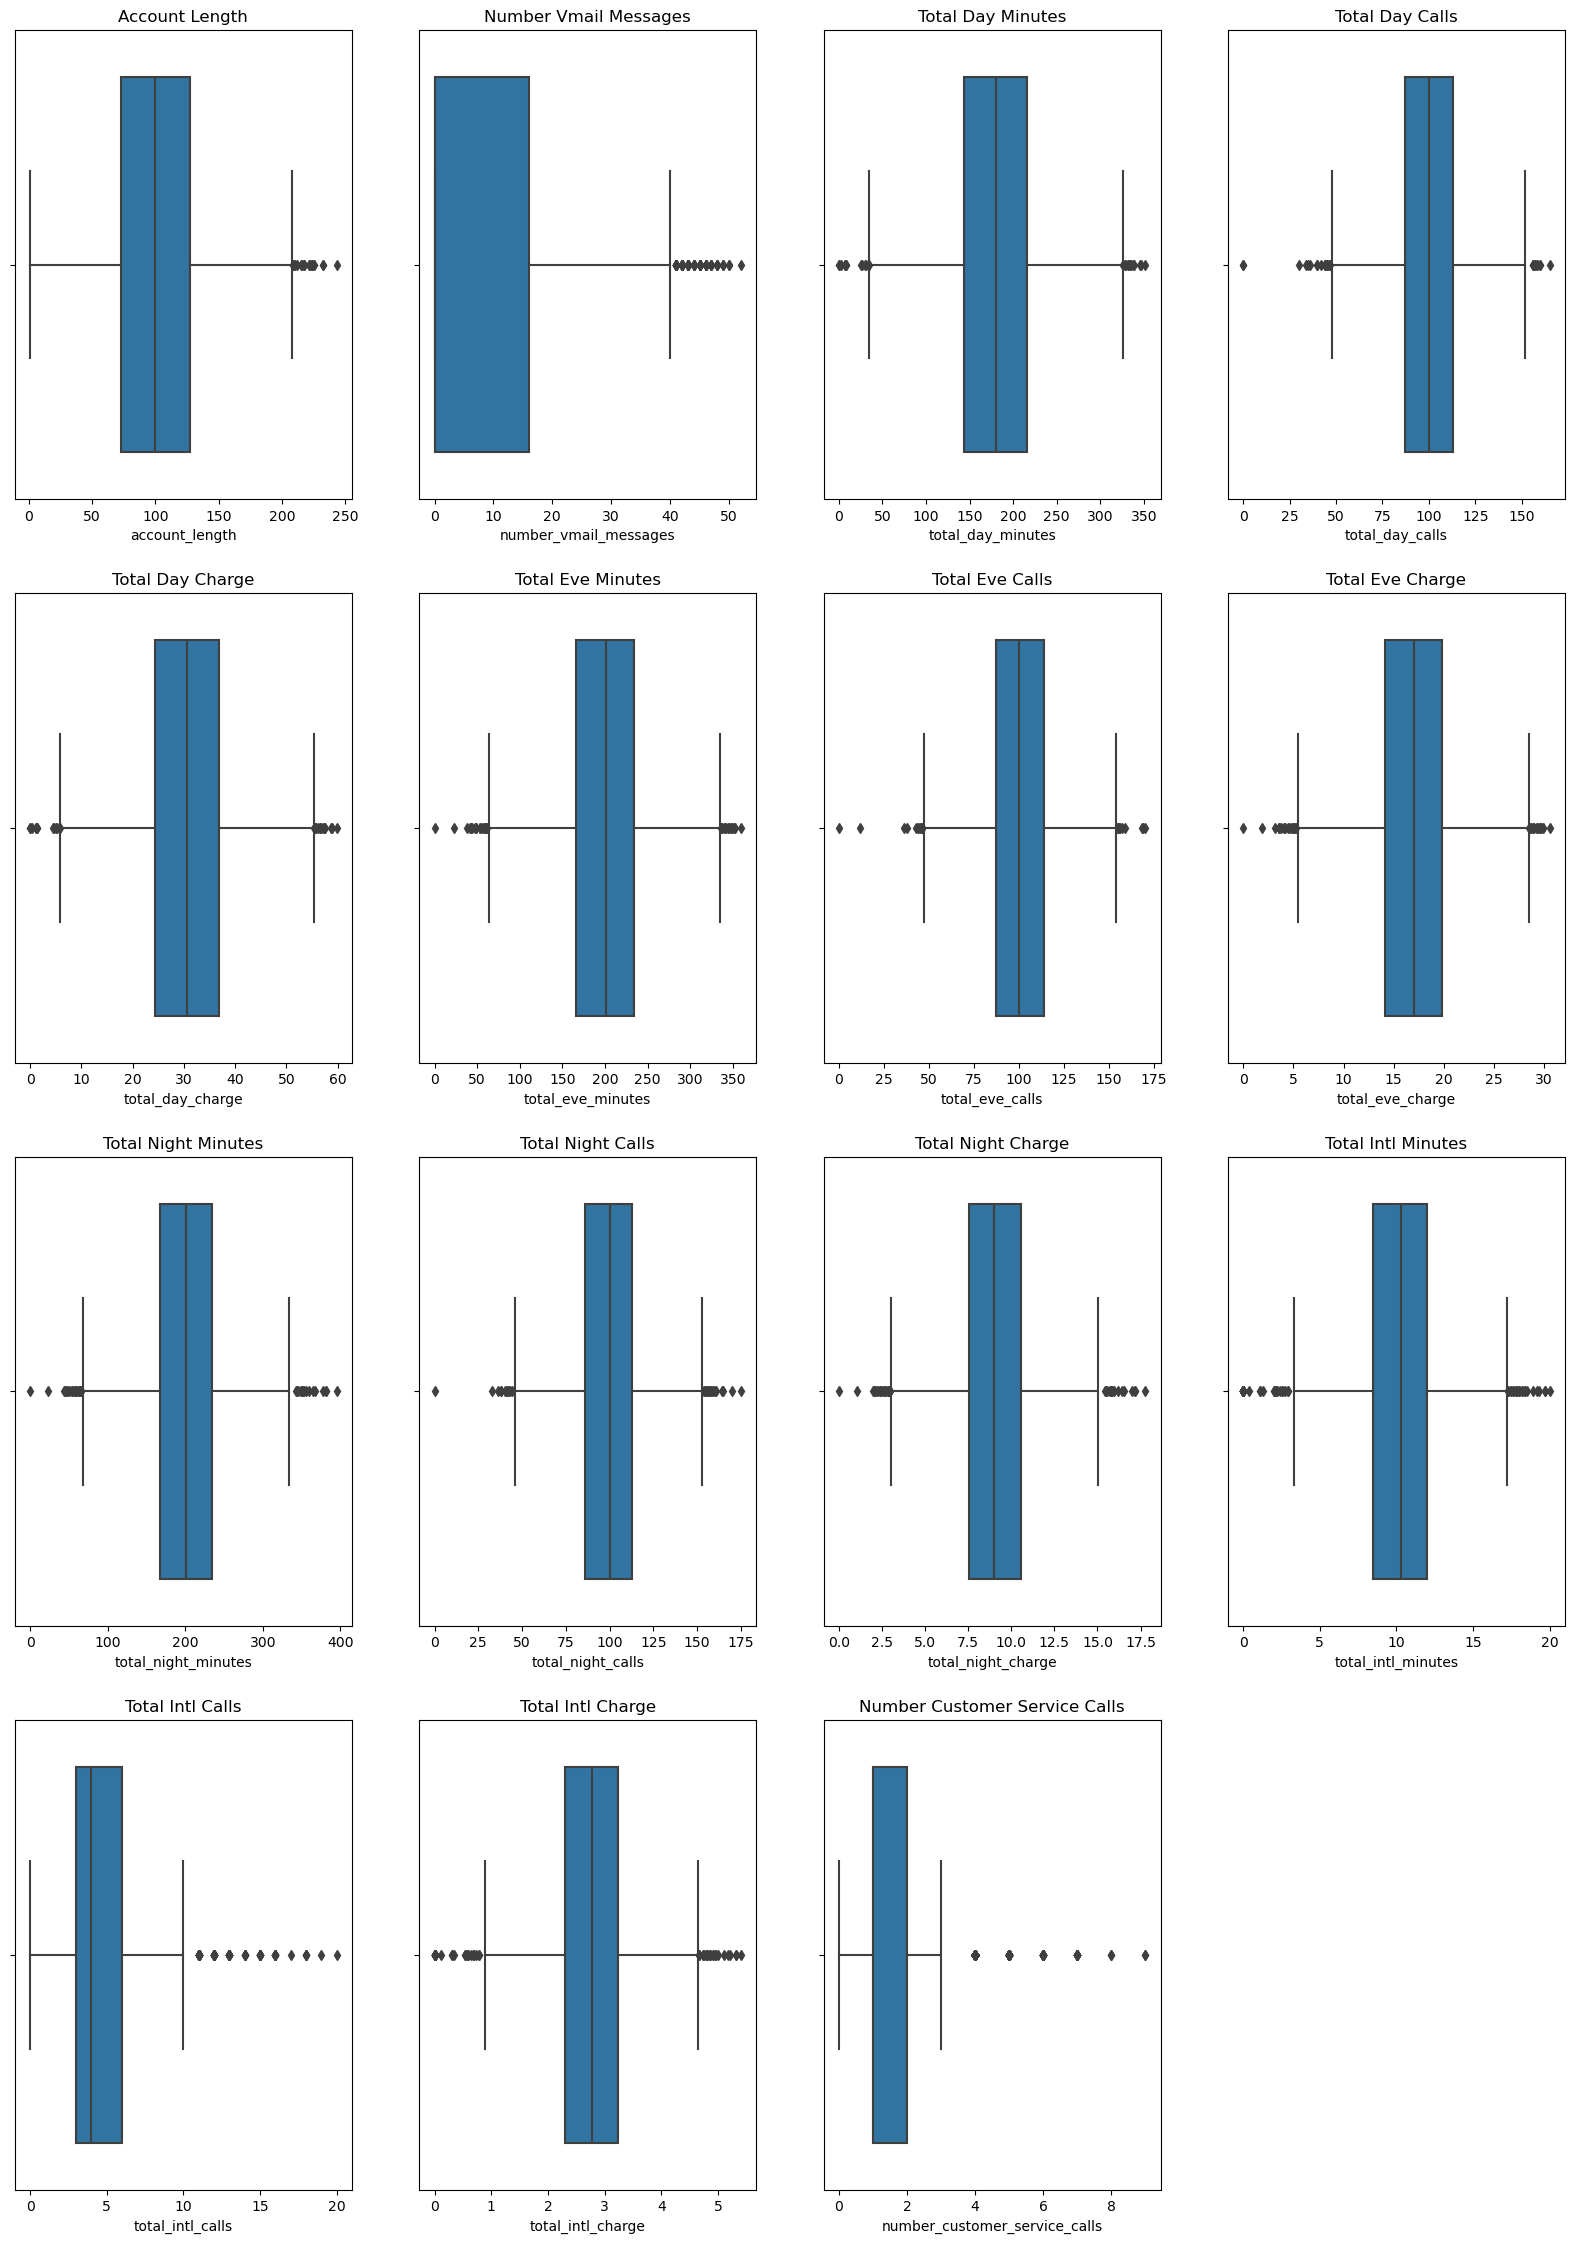

In [25]:
# Visualization with outlier data
num_column = df.describe().columns.values
colour = ['lightcoral','lightseagreen', 'springgreen', 'deepskyblue', 'gray', 'violet', 'brown', 'lightcoral', 'deeppink', 'peru',
          'purple', 'cyan', 'forestgreen', 'crimson', 'magenta']
fig = plt.figure(figsize=[20,50])
for i ,col in enumerate(num_column):
    ax = fig.add_subplot(7,4, i+1)
    ax = sns.boxplot(data = df, x=col)
    title = re.sub('_', ' ', col.title())
    ax.set_title(title)
    ax.set_xlabel(col)

# Feature Engineering

## Aggregate Features

In [26]:
# Numerical Data Summary
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00


## Features Encoding

In [27]:
counts_df = df['international_plan'].value_counts()
counts_df

international_plan
no     3854
yes     396
Name: count, dtype: Int64

In [28]:
counts_df = df['voice_mail_plan'].value_counts()
counts_df

voice_mail_plan
no     3138
yes    1112
Name: count, dtype: Int64

In [29]:
counts_df = df['churn'].value_counts()
counts_df

churn
no     3652
yes     598
Name: count, dtype: Int64

In [30]:
## Label Encoding
for col in ['international_plan', 'voice_mail_plan','churn']:
    df[col] = df[col].map({'yes':1, 'no':0})

In [31]:
counts_df = df['churn'].value_counts()
counts_df

churn
0    3652
1     598
Name: count, dtype: int64

In [32]:
df['total_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
df['total_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
df['total_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']

In [33]:
df.drop(columns=['total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge'])

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_calls,total_charge
0,OH,107,area_code_415,0,1,26,13.7,3,3.70,1,0,611.5,329,55.54
1,NJ,137,area_code_415,0,0,0,12.2,5,3.29,0,0,527.2,328,59.00
2,OH,84,area_code_408,1,0,0,6.6,7,1.78,2,0,558.2,248,65.02
3,OK,75,area_code_415,1,0,0,10.1,3,2.73,3,0,501.9,356,49.36
4,MA,121,area_code_510,0,1,24,7.5,7,2.03,3,0,779.3,314,76.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,0,0,0,10.3,6,2.78,0,0,645.8,237,62.35
4246,WV,73,area_code_408,0,0,0,11.5,6,3.11,3,0,495.3,260,49.77
4247,NC,75,area_code_408,0,0,0,6.9,7,1.86,1,0,492.9,331,51.24
4248,HI,50,area_code_408,0,1,40,9.9,5,2.67,2,0,756.2,369,72.42


In [34]:
df.sample(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_calls,total_charge
641,NJ,74,area_code_415,0,0,0,230.9,93,39.25,223.0,...,101,7.10,9.7,2,2.62,3,0,611.7,272,65.31
1323,NE,112,area_code_415,0,0,0,167.6,100,28.49,154.5,...,107,12.66,17.3,3,4.67,2,0,603.5,297,54.28
3346,RI,137,area_code_408,1,0,0,159.1,80,27.05,239.8,...,96,11.21,8.5,5,2.30,0,0,647.9,257,58.64
1790,MI,122,area_code_510,0,0,0,144.2,87,24.51,212.2,...,87,7.62,9.5,4,2.57,0,0,525.7,248,50.17
1868,OH,132,area_code_415,0,1,10,182.9,54,31.09,292.4,...,116,6.40,11.5,4,3.11,0,0,617.6,238,62.34


In [35]:
df.dtypes

state                            string[python]
account_length                            int64
area_code                        string[python]
international_plan                        int64
voice_mail_plan                           int64
number_vmail_messages                     int64
total_day_minutes                       float64
total_day_calls                           int64
total_day_charge                        float64
total_eve_minutes                       float64
total_eve_calls                           int64
total_eve_charge                        float64
total_night_minutes                     float64
total_night_calls                         int64
total_night_charge                      float64
total_intl_minutes                      float64
total_intl_calls                          int64
total_intl_charge                       float64
number_customer_service_calls             int64
churn                                     int64
total_minutes                           

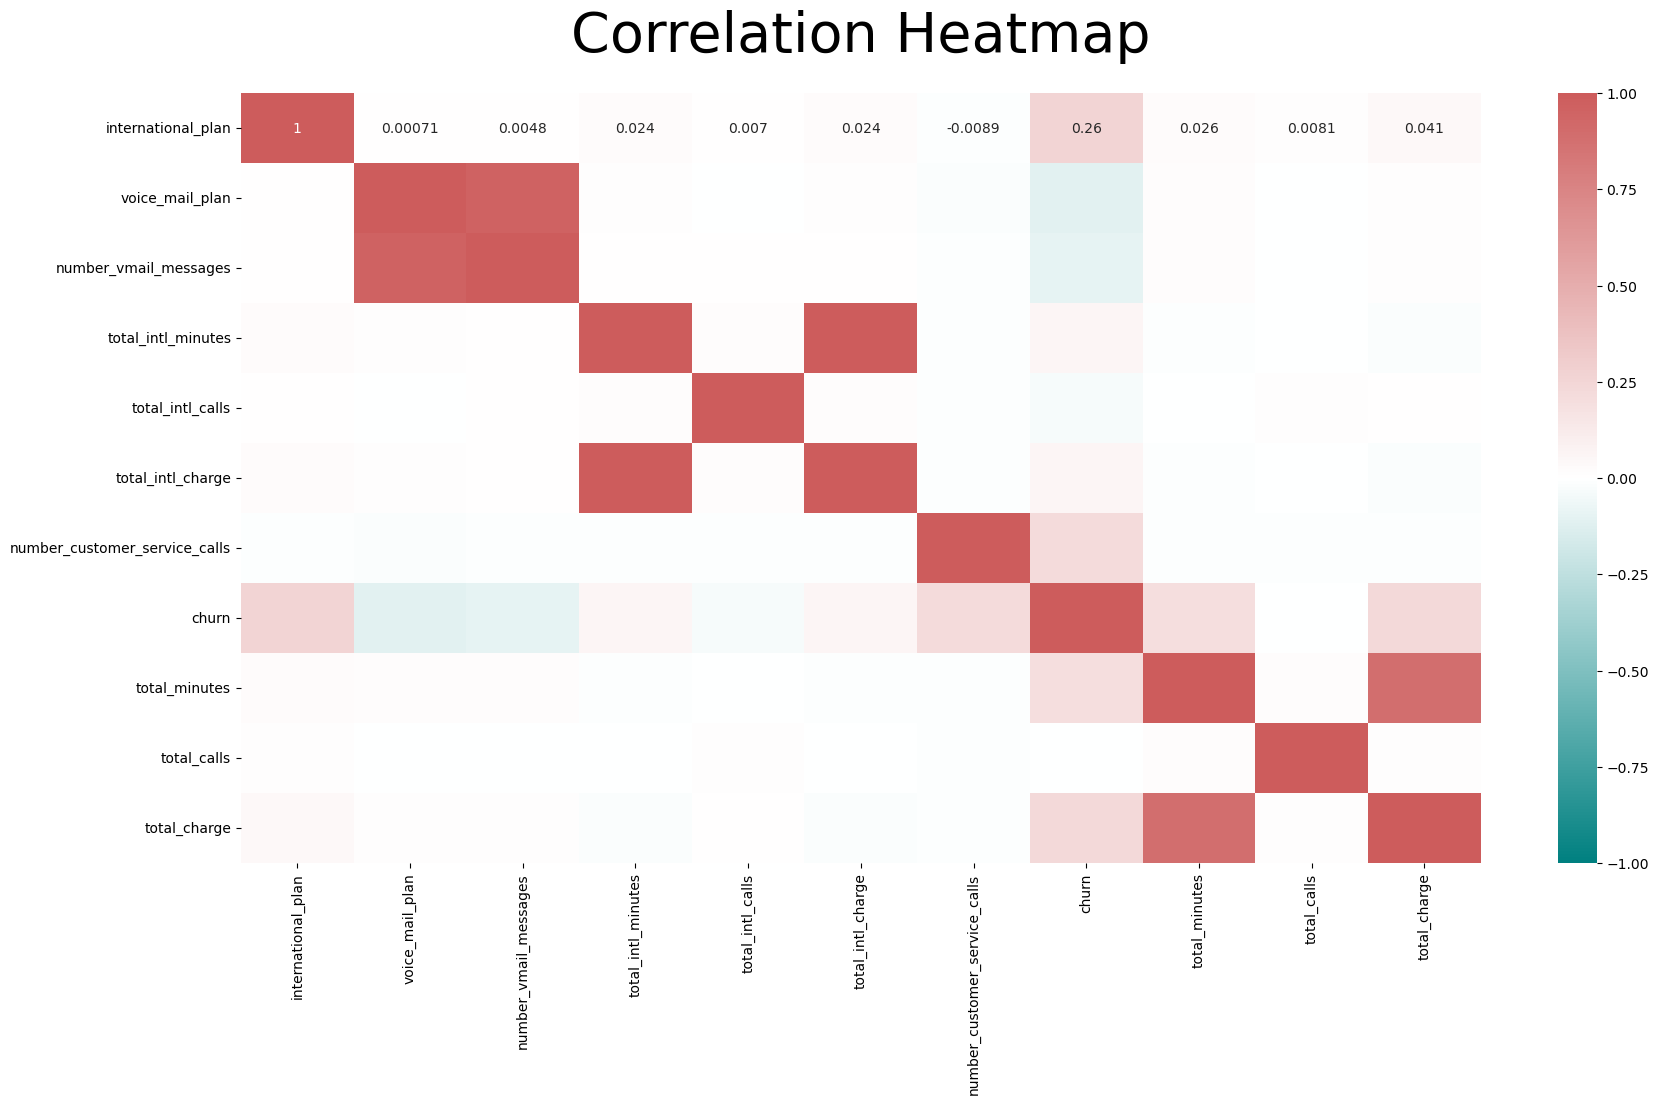

In [36]:
exclude_column = ['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_day_calls', 'total_eve_calls', 'total_night_calls', 'total_day_charge', 'total_eve_charge', 'total_night_charge', 'state', 'area_code', 'account_length']
from matplotlib.colors import LinearSegmentedColormap
colors = [(0, 'teal'), (0.5, 'white'), (1, 'indianred')]
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)
plt.figure(figsize=(20,10))
ax = sns.heatmap(df.drop(columns=exclude_column).corr(), annot=True, cmap=cmap, vmin=-1, vmax=1)
ax.set_title('Correlation Heatmap', fontdict={'fontsize':40}, pad=30)
plt.show()

# Feature Selection

In [37]:
data = df.drop(columns=exclude_column)
data.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_calls,total_charge
0,0,1,26,13.7,3,3.70,1,0,611.5,329,55.54
1,0,0,0,12.2,5,3.29,0,0,527.2,328,59.00
2,1,0,0,6.6,7,1.78,2,0,558.2,248,65.02
3,1,0,0,10.1,3,2.73,3,0,501.9,356,49.36
4,0,1,24,7.5,7,2.03,3,0,779.3,314,76.28


In [38]:
# Feature Selection
from sklearn import model_selection
from sklearn.model_selection import train_test_split

y = data['churn']
x = data.drop(columns='churn')


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x['number_vmail_messages'] = MinMaxScaler().fit_transform(x['number_vmail_messages'].values.reshape(len(x), 1))
x['total_intl_minutes'] = MinMaxScaler().fit_transform(x['total_intl_minutes'].values.reshape(len(x), 1))
x['total_intl_calls'] = MinMaxScaler().fit_transform(x['total_intl_calls'].values.reshape(len(x), 1))
x['total_intl_charge'] = MinMaxScaler().fit_transform(x['total_charge'].values.reshape(len(x), 1))
x['number_customer_service_calls'] = MinMaxScaler().fit_transform(x['number_customer_service_calls'].values.reshape(len(x), 1))
x['total_minutes'] = MinMaxScaler().fit_transform(x['total_minutes'].values.reshape(len(x), 1))
x['total_calls'] = MinMaxScaler().fit_transform(x['total_calls'].values.reshape(len(x), 1))
x['total_charge'] = MinMaxScaler().fit_transform(x['total_charge'].values.reshape(len(x), 1))

In [41]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessor = StandardScaler()
# Model Selection
models = {
    'LogisticRegression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'MLP': MLPClassifier()
}

# Function to train and evaluate models for fraud data
def train_evaluate_model(model_name, model, x_train, x_test, y_train, y_test):
    # Create a pipeline with preprocessing and model
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), # Change the variable name to model_pipeline
                               ('classifier', model)])
    # Train the model
    model_pipeline.fit(x_train, y_train)

    # Make predictions
    y_pred = model_pipeline.predict(x_test) # Use the new variable name here as well

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return{
        'model': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }


In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# Train and evaluate models

results = []
for model_name, model in models.items():
    results.append(train_evaluate_model(model_name, model, x_train, x_test, y_train, y_test))
# Display results

results_df = pd.DataFrame(results)

print("Data Results:\n", results_df)


Data Results:
                 model  accuracy  precision    recall  f1_score
0  LogisticRegression  0.865882   0.676471  0.235897  0.349810
1       Decision Tree  0.948235   0.830769  0.830769  0.830769
2       Random Forest  0.970980   0.959302  0.846154  0.899183
3   Gradient Boosting  0.971765   0.954286  0.856410  0.902703
4                 MLP  0.948235   0.910828  0.733333  0.812500


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

